In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [4]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'train',
    labels = 'inferred',
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

Found 13250 files belonging to 25 classes.


In [5]:
val_ds = keras.utils.image_dataset_from_directory(
    directory = 'val',
    labels = 'inferred',
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

Found 1750 files belonging to 25 classes.


In [6]:
def process(image,label):
    image  = tf.cast(image/255.,tf.float32)
    return image , label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [7]:
model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),padding = 'valid',activation = 'relu',input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(64,kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(64,kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(25,activation = 'softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [9]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [10]:
history = model.fit(train_ds,epochs = 50, validation_data = val_ds)

Epoch 1/50
415/415 [==============================] - 432s 1s/step - loss: 2.3630 - accuracy: 0.2911 - val_loss: 0.4326 - val_accuracy: 0.8646
Epoch 2/50
415/415 [==============================] - 459s 1s/step - loss: 2.1763 - accuracy: 0.3306 - val_loss: 0.4218 - val_accuracy: 0.8594
Epoch 3/50
415/415 [==============================] - 457s 1s/step - loss: 2.1598 - accuracy: 0.3362 - val_loss: 0.7177 - val_accuracy: 0.8240
Epoch 4/50
415/415 [==============================] - 414s 998ms/step - loss: 2.1457 - accuracy: 0.3387 - val_loss: 0.4635 - val_accuracy: 0.8806
Epoch 5/50
415/415 [==============================] - 406s 976ms/step - loss: 2.1278 - accuracy: 0.3506 - val_loss: 0.4959 - val_accuracy: 0.8943
Epoch 6/50
415/415 [==============================] - 410s 988ms/step - loss: 2.0951 - accuracy: 0.3642 - val_loss: 0.4822 - val_accuracy: 0.8949
Epoch 7/50
415/415 [==============================] - 438s 1s/step - loss: 2.0495 - accuracy: 0.3829 - val_loss: 0.5853 - val_accurac

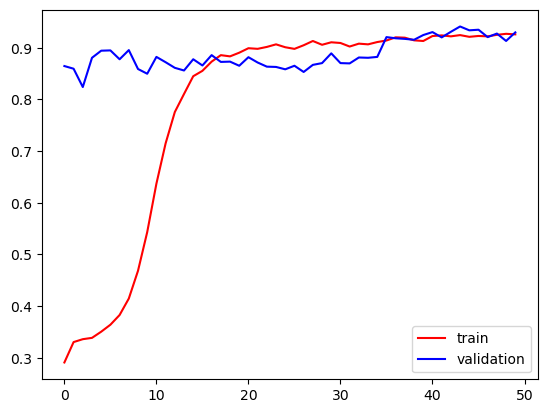

In [11]:
plt.plot(history.history['accuracy'],color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue', label = 'validation')
plt.legend()
plt.show()

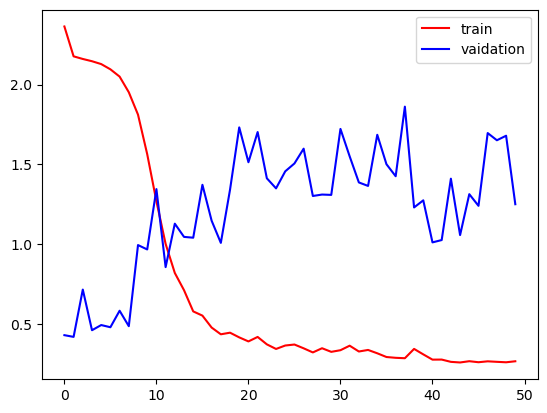

In [13]:
plt.plot(history.history['loss'],color = 'red',label = 'train')
plt.plot(history.history['val_loss'],color = 'blue',label = 'vaidation')
plt.legend()
plt.show()